In [88]:
import pandas as pd
import numpy as np
import io
import re
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
from sklearn.decomposition import PCA

In [2]:
DELIMITER = '//'

In [45]:
# Load the data
with io.open('/Users/kyosuke.morita/project_v2/Lyrics_generator/resources/data/krisko_lyrics.txt', encoding='utf-8') as f:
    krisko_text = f.read().lower().replace('\n', ' \n ')
print('Corpus length in characters:', len(text))

Corpus length in characters: 77769


In [5]:
# Split into words and make a dataframe
words = [w for w in krisko_text.split(' ') if w.strip() != '' or w == '\n']
print('Corpus length in words:', len(words))
word_df = pd.DataFrame(words,columns=['word'])

Corpus length in words: 16426


In [7]:
print('Number of unique words:', word_df.word.nunique())

Number of unique words: 3778


In [8]:
# Get most frequently used words top 30
top = word_df.word.value_counts().head(100)
print(top.head(30))

\n      2661
да       533
и        315
не       284
е        235
ти       212
се       199
си       179
с        170
ми       169
на       162
за       149
те       123
ме       120
съм      118
в        118
няма     116
като     107
-        104
аз        87
от        82
ще        81
са        78
мен       73
че        69
ги        67
до        64
дон,      64
ли        63
само      62
Name: word, dtype: int64


In [9]:
# For word cloud
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [10]:
wc = WordCloud(background_color="white", max_words=100,
               max_font_size=50, random_state=42)

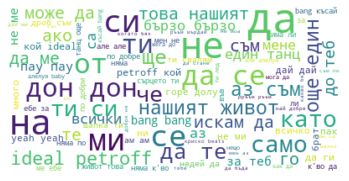

In [13]:
output = wc.generate(krisko_text)

plt.figure()
plt.imshow(output,interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
from spacy.lang.bg.stop_words import STOP_WORDS as BG_STOPWORDS


# preprocessing
krisko_cleaned = re.sub('\[,.*?“”…\]', '', krisko_text)

# tokenise
TOKENS = word_tokenize(krisko_cleaned) 
# filtered_sentence = [w for w in WORD_TOKENS if not w in STOP_WORDS] 

# add some new stop words
EXTRA_STOPWORDS = {'теб','дон','кво','к\'во','бях','мене','нашият','ма','ше','yeah',
                    'недей','ей','ко','bang','ам','тебе','you','тука','мойта','тва',
                    'але-але-алелуя','алеалеалелуя','кат','tak','“','моа','оп','о',
                    '’','ся','та','тез','дето','ја','aз','tik','i','ѝ','ток','твоя',
                    'a','some','ideal','petroff','–','так','кво','дай','тия','ee','к'}
BG_STOPWORDS.update(EXTRA_STOPWORDS)

filtered_sentence = []
  
for w in TOKENS: 
    if w not in BGSTOPWORDS: 
        filtered_sentence.append(w)

with open ('/Users/kyosuke.morita/project_v2/Lyrics_generator/resources/data/krisko_cleaned.txt','w') as output:
    output.write(str(filtered_sentence))

with io.open('/Users/kyosuke.morita/project_v2/Lyrics_generator/resources/data/krisko_cleaned.txt', encoding='utf-8') as f:
    krisko_cleaned = f.read()

krisko_cleaned = re.sub('[%s]' % re.escape(string.punctuation), '', krisko_cleaned)

In [47]:
words = [w for w in krisko_cleaned.split(' ') if w.strip() != '' or w == '\n']
print('Corpus length in words:', len(words))

word_df = pd.DataFrame(words,columns=['word'])
word_df.word.nunique()
top = word_df.word.value_counts().head(30)
print(top)

Corpus length in words: 6365
искам      45
брат       39
бързо      39
горе       35
искаш      28
идвам      26
шапка      25
мали       25
танц       24
сърцето    23
baby       23
знаеш      22
долу       22
късай      21
кажа       21
дроб       21
говорят    20
късно      20
свалям     19
криско     19
подобре    18
обичам     18
пари       18
ебе        17
бон        16
лед        16
стане      16
бъда       16
жега       16
подобри    16
Name: word, dtype: int64


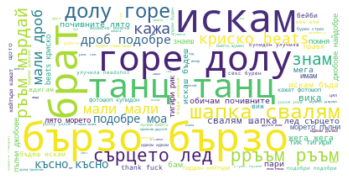

In [39]:
output = wc.generate(krisko_cleaned)

plt.figure()
plt.imshow(output,interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from gensim.models import Phrases

In [48]:
# preparation
input_words = []

for i in sent_tokenize(krisko_cleaned): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    input_words.append(temp)


In [178]:
# Create a word2vec model
w2vModel = Word2Vec(input_words, min_count=1, size=1000, window=1)

In [179]:
print('Similarity between мъж and жена: '+str(w2vModel.similarity('мъж','жена')))

Similarity between мъж and жена: -0.026726926


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [51]:
pd.DataFrame(w2vModel.most_similar('жена'),columns=['similar_word','similarity'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


,similar_word,similarity
0,брули,0.460222
1,докат,0.450121
2,афтърмен,0.429398
3,лашкаме,0.407489
4,бентли,0.405017
5,даваме,0.399845
6,фина,0.390725
7,кинта,0.390702
8,губя,0.384657
9,мойче,0.383628


In [192]:
woman_df = pd.DataFrame(w2vModel.most_similar('жена'),columns=['similar_word','similarity'])
translate = ['bucket','noisy','I know','you come','polo','folk','ashamed','bon','bat','opportunity']
woman_df['translation'] = translate
woman_df = woman_df[['similar_word','translation','similarity']]
woman_df.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


,similar_word,translation,similarity
0,кинта,bucket,0.118640
1,шумен,noisy,0.095540
2,знам,I know,0.095404
3,дојдеш,you come,0.091160
4,пало,polo,0.089472
5,фолк,folk,0.088305
6,срам,ashamed,0.088107
7,бон,bon,0.087639
8,бате,bat,0.087419
9,възможност,opportunity,0.086408


In [44]:
pd.DataFrame(w2vModel.most_similar('мъж'),columns=['similar_word','similarity'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


,similar_word,similarity
0,респект,0.517948
1,адрес,0.497829
2,работиме,0.465195
3,средата,0.444406
4,чувам,0.443600
5,врата,0.441691
6,крачета,0.438877
7,купидон,0.429924
8,твоите,0.427979
9,спира,0.419587


In [193]:
man_df = pd.DataFrame(w2vModel.most_similar('мъж'),columns=['similar_word','similarity'])
translate = ['chief','household','tiger','goes away','we dream','lake','I ran','voodoo','haymans','stop']
man_df['translation'] = translate
man_df = man_df[['similar_word','translation','similarity']]
man_df.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


,similar_word,translation,similarity
0,главниот,chief,0.112306
1,побутва,household,0.105048
2,тигре,tiger,0.102313
3,поминува,goes away,0.098854
4,мечтаем,we dream,0.098815
5,езеро,lake,0.096475
6,хукнах,I ran,0.094371
7,вуду,voodoo,0.094368
8,хаймани,haymans,0.092333
9,спре,stop,0.089735


In [183]:
print('Similarity between искам and искаш: '+str(w2vModel.similarity('искам','искаш')))

Similarity between искам and искаш: 0.048260797


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [84]:
pd.DataFrame(w2vModel.predict_output_word('искаm'),columns=['next_word','probability'])

,next_word,probability
0,танц,0.000351
1,бон,0.000351
2,gettin,0.000351
3,мацки,0.000351
4,сърцето,0.000351
5,криско,0.000351
6,свалям,0.000351
7,лед,0.000351
8,thank,0.000351
9,шапка,0.000351


In [201]:
iskam_df = pd.DataFrame(w2vModel.predict_output_word('искаm'),columns=['next_word','probability'])
translate = ['gettin','chicks','dance','better','rum','fraction','hat','we smoke','fuck','roar']
iskam_df['translation'] = translate
iskam_df = iskam_df[['next_word','translation','probability']]
iskam_df.head(10)

,next_word,translation,probability
0,gettin,gettin,0.000351
1,мацки,chicks,0.000351
2,танц,dance,0.000351
3,подобре,better,0.000351
4,ръъм,rum,0.000351
5,дроб,fraction,0.000351
6,шапка,hat,0.000351
7,палим,we smoke,0.000351
8,fuck,fuck,0.000351
9,рръъм,roar,0.000351


In [66]:
pd.DataFrame(w2vModel.predict_output_word('имаш'),columns=['next_word','probability'])

,next_word,probability
0,късно,0.000354
1,бон,0.000353
2,шапка,0.000353
3,танц,0.000353
4,свалям,0.000353
5,тигири,0.000352
6,лято,0.000352
7,джобове,0.000352
8,хора,0.000352
9,нямаш,0.000352


In [184]:
pd.DataFrame(w2vModel.predict_output_word('имаш'),columns=['next_word','probability'])

,next_word,probability
0,прайш,0.000351
1,напрай,0.000351
2,лято,0.000351
3,свалям,0.000351
4,djя,0.000351
5,напрайш,0.000351
6,антилопа,0.000351
7,ръъм,0.000351
8,махалата,0.000351
9,подпали,0.000351


In [202]:
iskash_df = pd.DataFrame(w2vModel.predict_output_word('искаш'),columns=['next_word','probability'])
translate = ['pass','do it','summer','take off','dja','do it','antelope','rum','the pendulum','set on fire']
iskash_df['translation'] = translate
iskash_df = iskash_df[['next_word','translation','probability']]
iskash_df.head(10)

,next_word,translation,probability
0,прайш,pass,0.000351
1,напрай,do it,0.000351
2,лято,summer,0.000351
3,свалям,take off,0.000351
4,djя,dja,0.000351
5,напрайш,do it,0.000351
6,антилопа,antelope,0.000351
7,ръъм,rum,0.000351
8,махалата,the pendulum,0.000351
9,подпали,set on fire,0.000351


In [238]:
def display_pca_scatterplot(model, words):
    
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA(random_state=42).fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(12,12))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.0003, y-0.0001, word)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


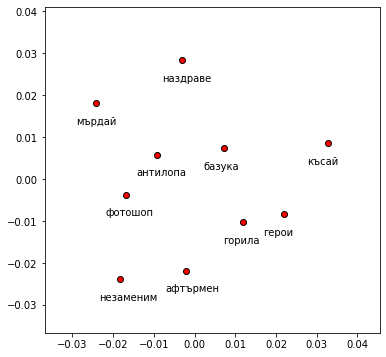

In [129]:
display_pca_scatterplot(w2vModel,
                       ['базука','афтърмен','горила','антилопа','фотошоп','късай','герои','мърдай','наздраве','незаменим'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


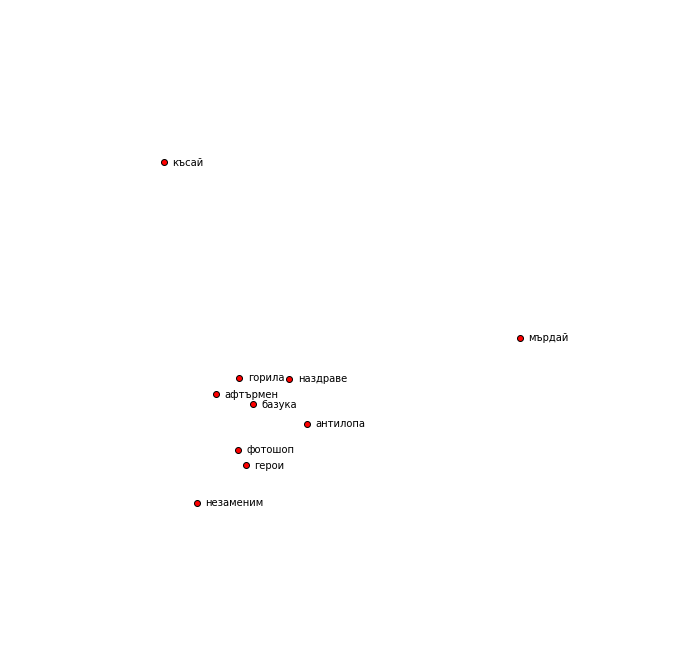

In [223]:
display_pca_scatterplot(w2vModel,
                       ['базука','афтърмен','горила','антилопа','фотошоп','късай','герои','мърдай','наздраве','незаменим'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


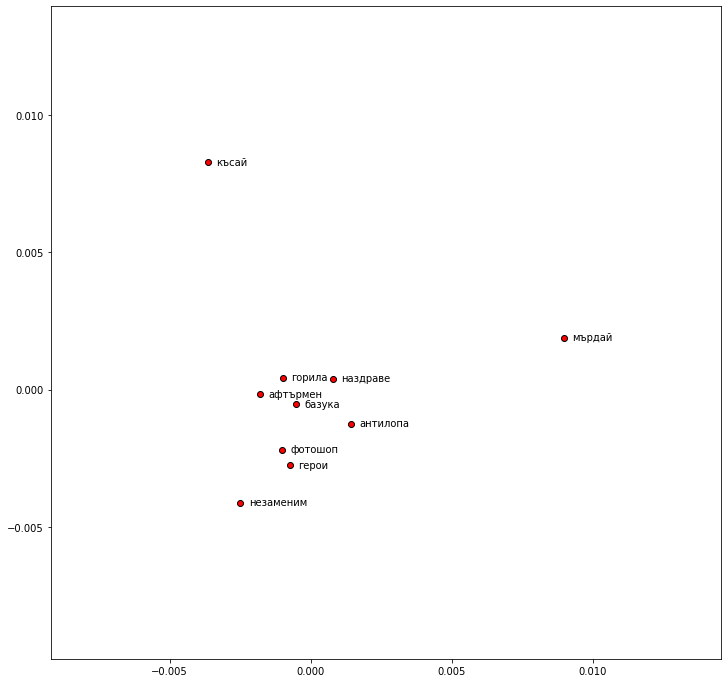

In [189]:
display_pca_scatterplot(w2vModel,
                       ['базука','афтърмен','горила','антилопа','фотошоп','късай','герои','мърдай','наздраве','незаменим'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


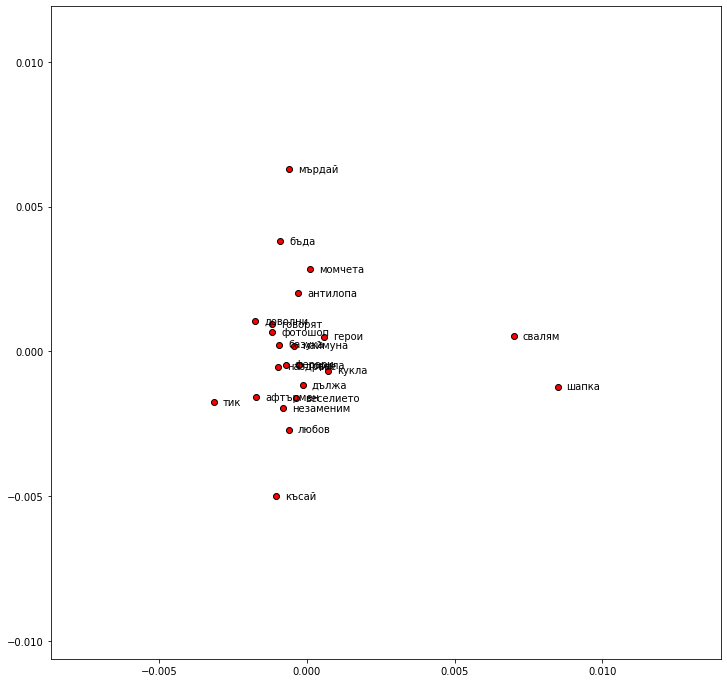

In [239]:
display_pca_scatterplot(w2vModel,
                       ['базука','афтърмен','горила','антилопа','фотошоп','късай','герои','мърдай','наздраве',
                        'незаменим','тик','маймуна','доволни','момчета','бъда','кукла','любов','ферари','говорят',
                        'веселието','дължа','шапка','свалям'])